## Data Cleaner

In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

label_encoder = LabelEncoder()
std_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()
min_max_scaler = MinMaxScaler()

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

random_seed=12345

### 1. Exploration

In [127]:
# Load data
data = pd.read_csv(os.path.join("dataset", "diabetic_data.csv"))
print(data.columns)
data.head().T

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [128]:
print(data.info())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


### 2. Cleaning

In [129]:
# Calculate NaN percentages and show the invalid features
# In small dataset, any feauture with NaN >30% are considerd invalid
features_to_remove = []

def check_null(data):
    data_null = data.isnull().mean()
    missing = []
    for i in range(len(data_null)):
        if data_null[i] != 0.0:
            missing.append(data.columns[i])
            print(data_null[i]*100,'% of col ',data.columns[i]," is null." )
    
    if(missing== []):
        print('There is no Null value')
    else :
        print(missing)
        
check_null(data)

94.74677200636755 % of col  max_glu_serum  is null.
83.27732248491637 % of col  A1Cresult  is null.
['max_glu_serum', 'A1Cresult']


In [130]:
features_to_remove.extend(["encounter_id", "patient_nbr", "payer_code","encounter_id", "weight", "medical_specialty"])

In [131]:
print("Total data = ", len(data))
data.drop_duplicates(["patient_nbr"], keep = "first", inplace = True)

Total data =  101766


In [132]:
for col in data.columns:
  print(f"{col}:")
  print(data[col].unique(), "\n")

encounter_id:
[  2278392    149190     64410 ... 443842070 443842340 443867222] 

patient_nbr:
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender:
['Female' 'Male' 'Unknown/Invalid'] 

age:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight:
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id:
[6 1 2 3 4 5 8 7] 

discharge_disposition_id:
[25  1  3  6  2  5 11  7 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27] 

admission_source_id:
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital:
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code:
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty:
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiol

In [133]:
# Resolve Nans
nan_list = ["?", "Unknown/Invalid", "Not Mapped", "NULL"]
for col in data.columns:
    data[col] = data[col].apply(lambda x : np.NaN if(x in nan_list) else x)
check_null(data)
print(features_to_remove)

2.7237898151514304 % of col  race  is null.
0.004194748175284544 % of col  gender  is null.
96.0107944853044 % of col  weight  is null.
43.4058558684527 % of col  payer_code  is null.
48.20744427976174 % of col  medical_specialty  is null.
0.01538074330937666 % of col  diag_1  is null.
0.41108532117788527 % of col  diag_2  is null.
1.7128555049078553 % of col  diag_3  is null.
95.16765010207222 % of col  max_glu_serum  is null.
81.84233339858497 % of col  A1Cresult  is null.
['race', 'gender', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
['encounter_id', 'patient_nbr', 'payer_code', 'encounter_id', 'weight', 'medical_specialty']


In [134]:
# Drop useless features
data.drop(features_to_remove, axis=1, inplace=True)
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<Axes: title={'center': 'Number of Patients per Age Group'}, xlabel='age'>

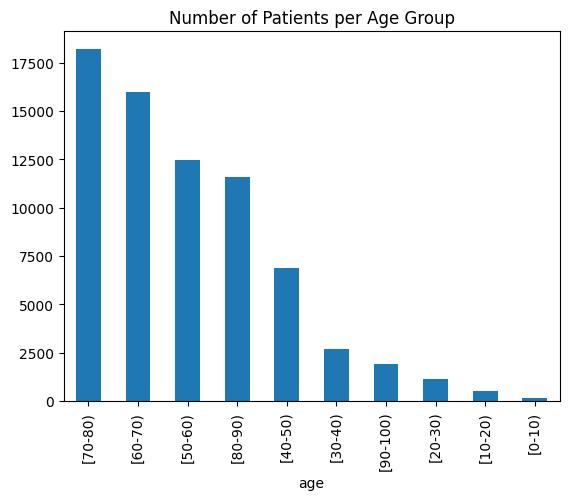

In [135]:
data.age.value_counts().plot(kind = "bar", title="Number of Patients per Age Group")

In [136]:
# PREPROCESS AGE
# Convert age from categorical to numeric
# Reason: age contain more information in numeric type
replaceDict = {"[0-10)" : 5,
"[10-20)" : 15,
"[20-30)" : 25, 
"[30-40)" : 35, 
"[40-50)" : 45, 
"[50-60)" : 55,
"[60-70)" : 65, 
"[70-80)" : 75,
"[80-90)" : 85,
"[90-100)" : 95}

data["age"] = data["age"].apply(lambda x : replaceDict[x])

In [137]:
data["max_glu_serum"].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [138]:
# Group some ids mapping to 1
# [6, 8, 9, 13] discharge to home
# [3, 4, 5, 14, 22, 23, 24] discharge to medical facility
# [12, 15, 16, 17] discharge, related to institution
# [19, 20, 21] expired
# [25, 26] unknow or invalid
data["discharge_disposition_id"] = data["discharge_disposition_id"].apply(lambda x : 1 if int(x) in [6, 8, 13, 19, 20] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 9, 10, 12, 14, 22, 23, 24]
                                                                           else ( 15 if int(x) in [16, 17, 27, 28, 29, 30]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) ))))
print(data.discharge_disposition_id.value_counts())                                                          

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

data["admission_type_id"] = data["admission_type_id"].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

data["admission_source_id"] = data["admission_source_id"].apply(lambda x : 1 if int(x) in [2, 3, 4, 7]
                                                            else ( 4 if int(x) in [5, 6, 8, 10, 18, 22, 25, 26]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14, 23, 24]
                                                            else int(x) ))))
print(data.admission_source_id.value_counts())      
# Possible label
data["change"] = data["change"].apply(lambda x : 1 if x == "Ch"
                                                 else 0)

# Possible label
data["diabetesMed"] = data["diabetesMed"].apply(lambda x : 0 if x == "No"
                                                else 1)


data["max_glu_serum"] = data["max_glu_serum"].apply(lambda x : 2 if x == ">200" 
                                                            else ( 3 if x == ">300"                                                          
                                                            else ( 1 if x == "Norm"
                                                            else  0)))

data["A1Cresult"] = data["A1Cresult"].apply(lambda x : 2 if x == ">7" 
                                                         else (3 if  x == ">8"                                                        
                                                         else ( 1 if x == "Norm"
                                                         else  0)))

data["readmitted"] = data["readmitted"].apply(lambda x : 0 if x == "NO"                                                        
                                                         else  1)

data.head().T

discharge_disposition_id
1     52929
2     13707
18     3252
11     1077
7       409
15      144
Name: count, dtype: int64
admission_source_id
1     63005
9      5106
4      2326
11        4
Name: count, dtype: int64


,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,1,1,1,1,1
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


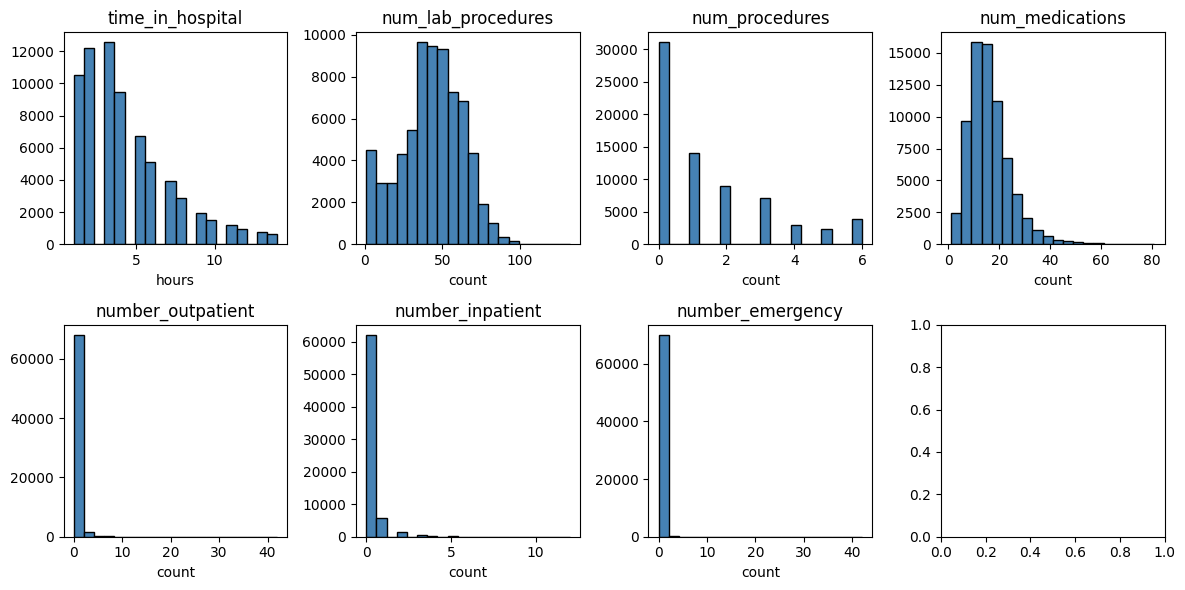

In [139]:
# Show number features
number_features = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", 
                   "number_outpatient", "number_inpatient", "number_emergency"]

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

axes = axes.flatten()

for i, feature in enumerate(number_features):
    ax = axes[i]  # Get the current subplot
    ax.hist(data[feature], bins=20, color='steelblue', edgecolor='black')  # Plot the histogram
    ax.set_title(feature)  # Set the title for the subplot
    
    if i == 0:
      ax.set_xlabel("hours")
    else:
      ax.set_xlabel("count")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

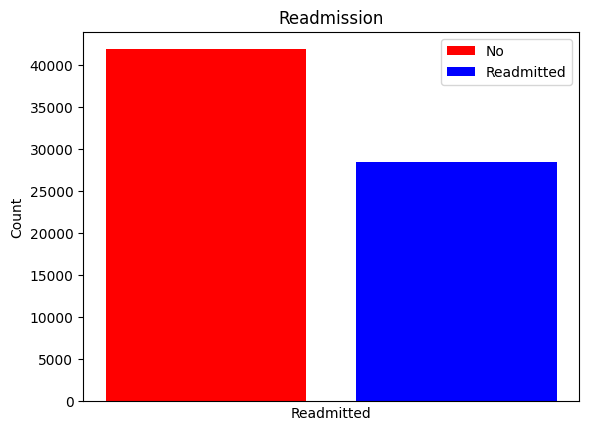

In [140]:
unique_values, counts = np.unique(data['readmitted'], return_counts=True)
x_labels = ['No', 'Readmitted']
colors = ['red', 'blue', 'green']

bars = plt.bar(x_labels, counts,color=colors,label=x_labels)
plt.xticks([])
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Readmission')
plt.legend()
plt.show()

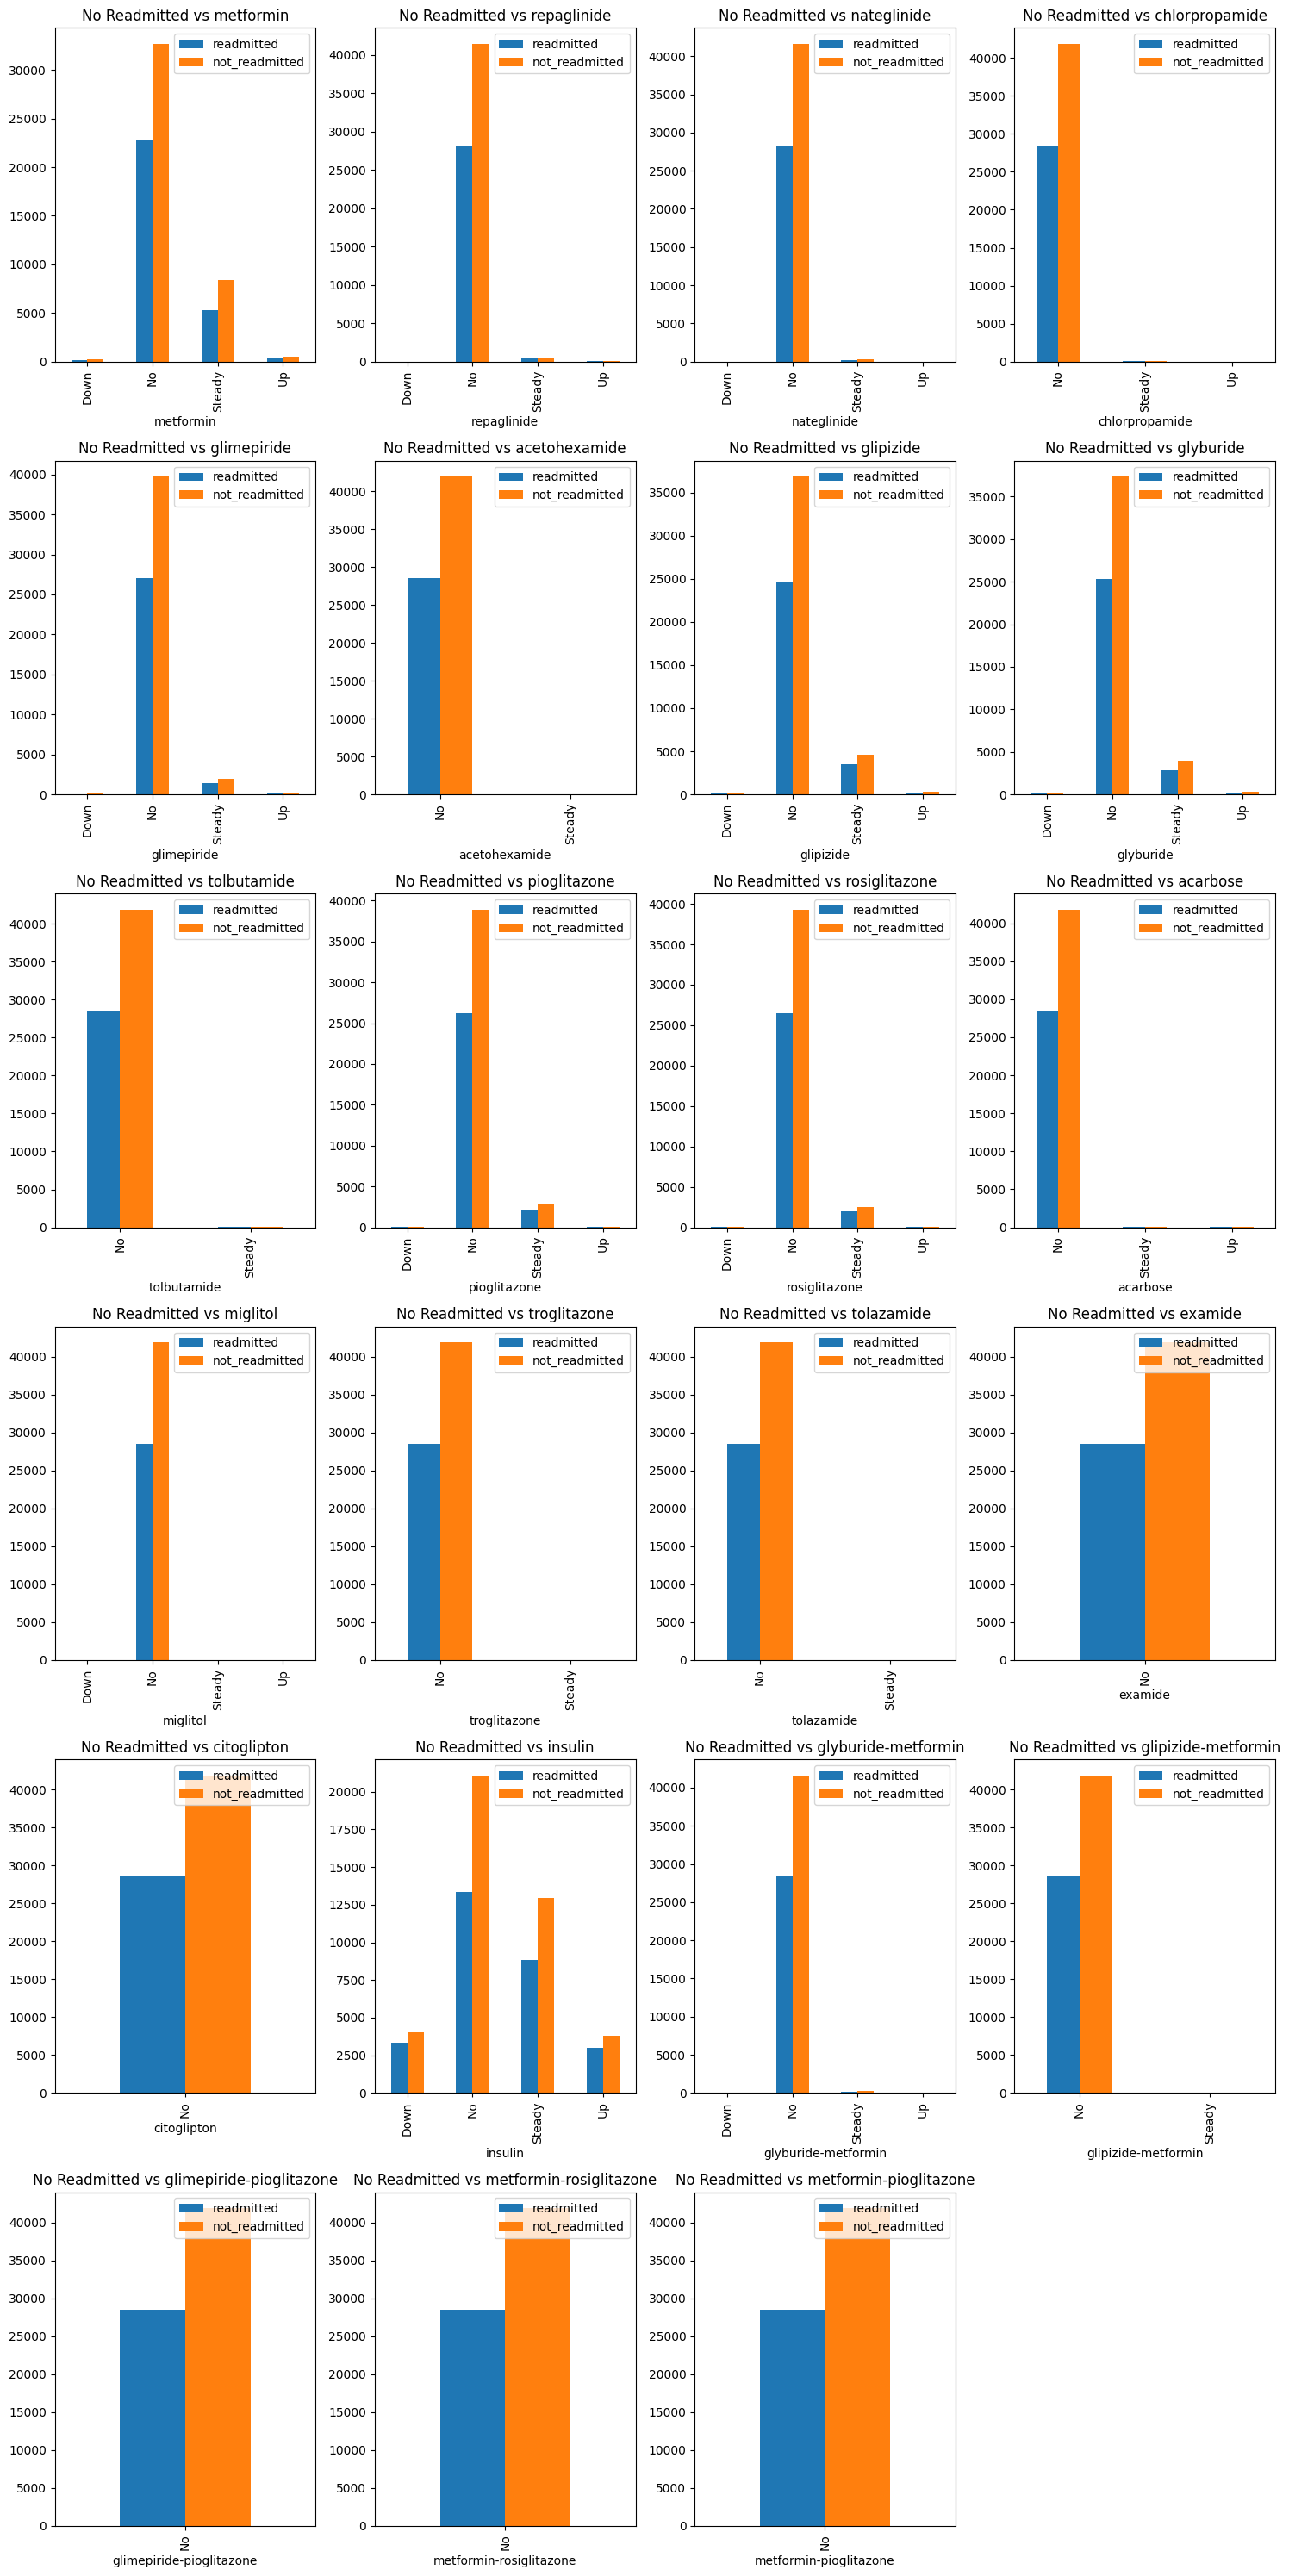

In [141]:
# Remove ineffective drugs
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin',
        'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone']

num_plots = len(drugs)
num_rows = int((num_plots + 3) / 4) 
num_cols = 4  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, drug in enumerate(drugs):
  df_drug = pd.DataFrame()
  df_drug["readmitted"] = data[data["readmitted"] == 1].groupby([drug])["readmitted"].count()
  df_drug["not_readmitted"] = data[data["readmitted"] == 0].groupby([drug])["readmitted"].count()
  title = f"No Readmitted vs {drug}"
  
  ax = axes[i]
  
  df_drug.plot(kind="bar", y=["readmitted", "not_readmitted"], title=title, ax=ax)
  
  ax.set_xlabel(drug)

for j in range(num_plots, num_rows * num_cols):
    axes[j].remove()

plt.tight_layout()
plt.show()

In [142]:
# Process drug test data
for col in drugs:
    data[col] = data[col].apply(lambda x : 3 if x == "Up" 
                                              else ( 1 if x == "Down"                                                          
                                              else ( 2 if x == "Steady"
                                              else  0)))

In [143]:
ineffective_drugs = ['repaglinide','nateglinide','chlorpropamide','acetohexamide', 'examide', 'tolbutamide',
                 'acarbose','miglitol', 'troglitazone','tolazamide','glyburide-metformin', 'citoglipton',
                 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

data.drop(ineffective_drugs, axis=1, inplace=True)
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [144]:
# PREPROCESS DIAG_1, DIAG_2, DIAG_3
# Fill NaNs with most common values
diags = ["diag_1", "diag_2", "diag_3"]
for diag in diags:
  common_diag = Counter(list(data[diag])).most_common(1)[0][0]
  data[diag] = data[diag].fillna(common_diag)
  print(f"No NaNs in {diag}:", len(data[data[diag].isna()]) == 0)
  
  data[diag] = data[diag].apply(lambda x : "other" if (str(x).find("V") != -1 or str(x).find("E") != -1)  
                                        else ("circulatory" if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else ("respiratory" if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else ("digestive"   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else ("diabetes"    if int(float(x)) == 250
                                        else ("injury"      if int(float(x)) in range(800, 1000)
                                        else ("musculoskeletal" if int(float(x)) in range(710, 740)
                                        else ("genitourinary"   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ("neoplasms"       if int(float(x)) in range(140, 240)
                                        else ("pregnecy"        if int(float(x)) in range(630, 680)
                                        else "other"))))))))))

print("\nShow converted diags:")
for diag in diags:
  print(diag)
  print(data[diag].head(), "\n")

No NaNs in diag_1: True
No NaNs in diag_2: True
No NaNs in diag_3: True

Show converted diags:
diag_1
0     diabetes
1        other
2     pregnecy
3        other
4    neoplasms
Name: diag_1, dtype: object 

diag_2
0     diabetes
1     diabetes
2     diabetes
3     diabetes
4    neoplasms
Name: diag_2, dtype: object 

diag_3
0       diabetes
1          other
2          other
3    circulatory
4       diabetes
Name: diag_3, dtype: object 



In [145]:
# Encode diags
print("\nEncode diags into numeric type:")
for diag in diags:
  data[diag] = label_encoder.fit_transform(data[diag])
  print(f"Encoded {diag}")
  print(data[diag].head(), "\n")


Encode diags into numeric type:
Encoded diag_1
0    1
1    7
2    8
3    7
4    6
Name: diag_1, dtype: int32 

Encoded diag_2
0    1
1    1
2    1
3    1
4    6
Name: diag_2, dtype: int32 

Encoded diag_3
0    1
1    7
2    7
3    0
4    1
Name: diag_3, dtype: int32 



In [146]:
# PREPROCESS GENDER
# Convert gender to binary (female: 0, male: 1)
# Remove rows that contain unknown/invalid gender
# Due to very small amount of datapoints

print("Number of Nan gender:", len(data[data["gender"].isna()]), "\n")
print("Encoder gender to binary:")
data["gender"] = label_encoder.fit_transform(data["gender"])
data["gender"]

Number of Nan gender: 3 

Encoder gender to binary:


0         0
1         0
2         0
3         1
4         1
         ..
101754    0
101755    0
101756    0
101758    0
101765    1
Name: gender, Length: 70441, dtype: int32

In [147]:
# Calculate service_ultilization (number of use medical services)
data["service_utilization"] = data["number_outpatient"] + data["number_inpatient"] + data["number_emergency"]
data.drop(["number_outpatient", "number_inpatient", "number_emergency"], axis=1, inplace=True)
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [148]:
# PREPROCESS RACE 
# Get races
print("Show races:", data["race"].unique())
# Encode race to numeric type but remain nan
data["race"] = data["race"].apply(lambda x : 0 if x == "Other" 
                                      else ( 1 if x == "Asian"                                                        
                                      else ( 2 if x == "Caucasian"
                                      else ( 3 if x == "AfricanAmerican"
                                      else ( 4 if x == "Hispanic"
                                      else  x)))))
print("Show encoded races:", data["race"].unique())

# Split non NaN and Nana
data_non_nan_race = data.dropna(subset=["race"])
data_nan_race = data[data["race"].isnull()]

# Check amount per subset
print("Non NaN dataset size:", len(data_non_nan_race))
print("NaN dataset size:",len(data_nan_race))

Show races: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
Show encoded races: [ 2.  3. nan  0.  1.  4.]
Non NaN dataset size: 68520
NaN dataset size: 1921


In [149]:
# Train random forest model
y_race = data_non_nan_race["race"].astype("int32")
X_race = data_non_nan_race.drop("race", axis=1)
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.2, random_state=random_seed, shuffle=True)

rf = RandomForestClassifier(max_depth=30, random_state=random_seed)
rf.fit(X_train_race, y_train_race)
print("Accuracy:", rf.score(X_test_race, y_test_race))
y_predict_race = rf.predict(data_nan_race.drop("race", axis=1))


Accuracy: 0.7721103327495622


In [150]:
# Recover dataset
data_nan_race.iloc[:, 0] = y_predict_race
data = pd.concat([data_non_nan_race, data_nan_race])
data["race"] = data["race"].astype("int32")
data["race"]

0         2
1         2
2         3
3         2
4         2
         ..
101533    2
101537    2
101659    2
101715    2
101732    2
Name: race, Length: 70441, dtype: int32

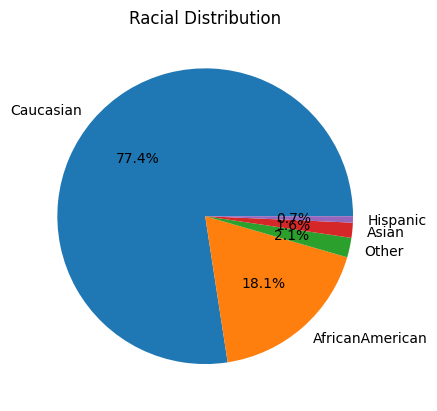

In [151]:
category_counts = data['race'].value_counts()
proportions = category_counts / len(data)
labels = ['Caucasian' ,'AfricanAmerican' ,'Other', 'Asian', 'Hispanic']
explode = (0, 0, 0, 0,0)  # To highlight a slice, you can use the explode parameter

# Plot the pie chart
plt.pie(proportions, explode=explode, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Racial Distribution')

# Show the plot
plt.show()


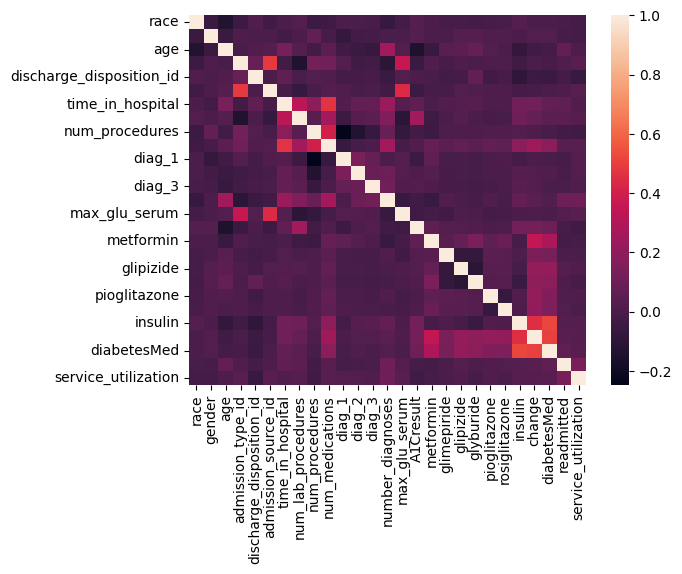

In [152]:
sns.heatmap(data.corr());

In [153]:
# SCALING CONTINUOUS VALUE FEATURES
features_to_scale = ['age', 'time_in_hospital','num_lab_procedures','num_procedures','num_medications', 
                       'number_diagnoses','service_utilization']

data[features_to_scale] = std_scaler.fit_transform(data[features_to_scale])

In [154]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [155]:
# Check non NaNs
print("Check each feature if it still contain nan:")
failed_test = 0
for col in data.columns:
  if len(data[data[col].isnull()]) != 0:
    failed_test += 1
    print(f"{col}", len(data[data[col].isnull()]) == 0)

if failed_test == 0:
  print("All passed!")
else:
  print("Failed!")

Check each feature if it still contain nan:
All passed!


In [156]:
# Check remaining columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70441 entries, 0 to 101732
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      70441 non-null  int32  
 1   gender                    70441 non-null  int32  
 2   age                       70441 non-null  float64
 3   admission_type_id         70441 non-null  int64  
 4   discharge_disposition_id  70441 non-null  int64  
 5   admission_source_id       70441 non-null  int64  
 6   time_in_hospital          70441 non-null  float64
 7   num_lab_procedures        70441 non-null  float64
 8   num_procedures            70441 non-null  float64
 9   num_medications           70441 non-null  float64
 10  diag_1                    70441 non-null  int32  
 11  diag_2                    70441 non-null  int32  
 12  diag_3                    70441 non-null  int32  
 13  number_diagnoses          70441 non-null  float64
 14  max_glu_se

In [157]:
# Output clean dataset
data.to_csv(path_or_buf=os.path.join("dataset", "clean_diabetic_dataset_2nd.csv"), index=False)

# Notes: Splitting data must be performed in main.py